In [57]:
#Importing necessary library
import pandas as pd
import numpy as np
import glob, os
import matplotlib.pyplot as plt
%matplotlib inline

from itertools import combinations
from collections import Counter

### Merge all files to single DataFrame

In [5]:
df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "*.csv"))))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Data Stats

In [6]:
df.shape

(186850, 6)

In [9]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [10]:
df['Product'].value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Product                         355
Name: Product, dtype: int64

#### Handling Na Values

In [12]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [13]:
df.dropna(inplace=True)
df.shape

(186305, 6)

In [14]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### Data Cleaning

In [18]:
# Making Columns correct Type
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'],errors='coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'],errors='coerce')
df['Order ID'] = pd.to_numeric(df['Order ID'],errors='coerce')

In [19]:
# Get rid of text in date column
df = df[df['Order Date'].str[0:2]!='Or']

In [20]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## Feature Engineering

In [21]:
# Adding month Column
df['Month'] = pd.to_datetime(df['Order Date']).dt.month
df.head()

c:\users\shaon\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


*Adding City Column*

In [22]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

In [23]:
df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
df.head()

c:\users\shaon\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


# Data Insight Exploration

### What was the best month for sales? How much was earned that month?

In [24]:
# New column for Sales
df['Sales'] = df['Quantity Ordered'] * df['Price Each'].astype('float')

c:\users\shaon\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
df.groupby(['Month']).sum()

,Order ID,Quantity Ordered,Price Each,Sales
Month,,,,
1,1.421631e+09,10903.0,1.811768e+06,1.822257e+06
2,1.871053e+09,13449.0,2.188885e+06,2.202022e+06
3,2.564811e+09,17005.0,2.791208e+06,2.807100e+06
4,3.387347e+09,20558.0,3.367671e+06,3.390670e+06
5,3.345872e+09,18667.0,3.135125e+06,3.152607e+06
6,2.932976e+09,15253.0,2.562026e+06,2.577802e+06
7,3.284140e+09,16072.0,2.632540e+06,2.647776e+06
8,2.899374e+09,13448.0,2.230345e+06,2.244468e+06
9,2.948727e+09,13109.0,2.084992e+06,2.097560e+06


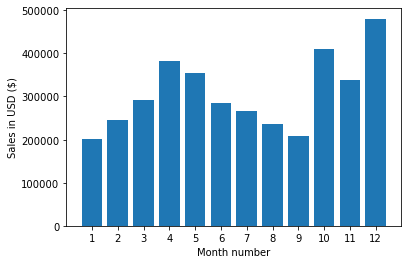

<Figure size 432x288 with 0 Axes>

In [68]:
#months = range(1,13)
#print(months)

plt.bar(months,df.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()
plt.savefig('SalesByMonth.png')

In [38]:
SalesByMonth=df.groupby(['Month'])

for month, data in SalesByMonth:
    if month==12:
        print("Total Sales in December($):",data['Sales'].sum())

Total Sales in December($): 4613443.34


### Which city sold the most product?

In [43]:
df.groupby(['City']).sum()['Quantity Ordered']

City
Atlanta  (GA)          16602.0
Austin  (TX)           11153.0
Boston  (MA)           22528.0
Dallas  (TX)           16730.0
Los Angeles  (CA)      33289.0
New York City  (NY)    27932.0
Portland  (ME)          2750.0
Portland  (OR)         11303.0
San Francisco  (CA)    50239.0
Seattle  (WA)          16553.0
Name: Quantity Ordered, dtype: float64

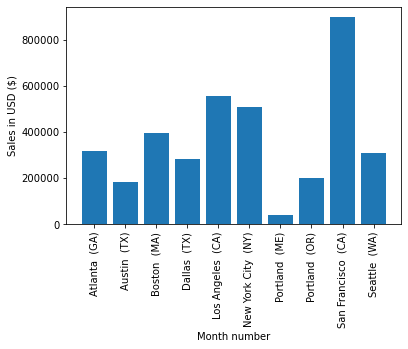

<Figure size 432x288 with 0 Axes>

In [69]:
import matplotlib.pyplot as plt

keys = [city for city, df in df.groupby(['City'])]

plt.bar(keys,df.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=10)
plt.show()
plt.savefig('SalesByCity.png')

### What time should we display advertisements to maximize likelihood of customer's buying product?

In [49]:
# Add columns for time
df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour
df['Minute'] = pd.to_datetime(df['Order Date']).dt.minute
df['Count']=1
df.head()

c:\users\shaon\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\shaon\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\shaon\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46,1
2,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30,1
3,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38,1
4,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38,1
5,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9,27,1


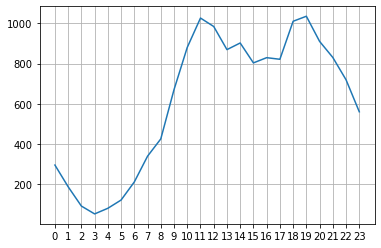

<Figure size 432x288 with 0 Axes>

In [70]:
keys = [pair for pair, df in df.groupby(['Hour'])]

plt.plot(keys, df.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()
plt.savefig('QuantityOrderedByTime.png')

**My recommendation for starting advertisement is 7 to 10 am**

###  Which products are most often sold together?

In [51]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = df[df['Order ID'].duplicated(keep=False)]

In [52]:
df.shape

(14649, 12)

In [54]:
# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df1=df.copy()
df1['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count,Grouped
3,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38,1,"Google Phone,Wired Headphones"
4,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38,1,"Google Phone,Wired Headphones"
18,176574.0,Google Phone,1.0,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,19,42,1,"Google Phone,USB-C Charging Cable"
19,176574.0,USB-C Charging Cable,1.0,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles (CA),11.95,19,42,1,"Google Phone,USB-C Charging Cable"
30,176585.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,Boston (MA),99.99,11,31,1,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [55]:
df1 = df1[['Order ID', 'Grouped']].drop_duplicates()

In [56]:
df1.head()

,Order ID,Grouped
3,176560.0,"Google Phone,Wired Headphones"
18,176574.0,"Google Phone,USB-C Charging Cable"
30,176585.0,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586.0,"AAA Batteries (4-pack),Google Phone"
119,176672.0,"Lightning Charging Cable,USB-C Charging Cable"


In [59]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

count = Counter()

for row in df1['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


**Most of the time 'iPhone', 'Lightning Charging Cable' are sold together**

### What product sold the most? What is the reason behind it?

In [61]:
product_group = df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
display(quantity_ordered)

Product
20in Monitor                   161.0
27in 4K Gaming Monitor         251.0
27in FHD Monitor               298.0
34in Ultrawide Monitor         247.0
AA Batteries (4-pack)         1013.0
AAA Batteries (4-pack)        1251.0
Apple Airpods Headphones       982.0
Bose SoundSport Headphones     827.0
Flatscreen TV                  179.0
Google Phone                  1642.0
LG Dryer                        25.0
LG Washing Machine              28.0
Lightning Charging Cable      1949.0
Macbook Pro Laptop             197.0
ThinkPad Laptop                176.0
USB-C Charging Cable          2292.0
Vareebadd Phone                602.0
Wired Headphones              1825.0
iPhone                        1867.0
Name: Quantity Ordered, dtype: float64

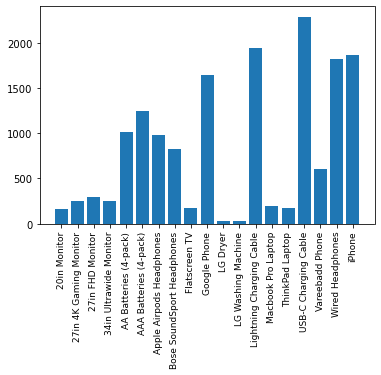

In [63]:
# Visualize
keys = [key for key, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=9)
plt.show()

**So, USB-C Charging Cable are sold most of the time**

c:\users\shaon\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


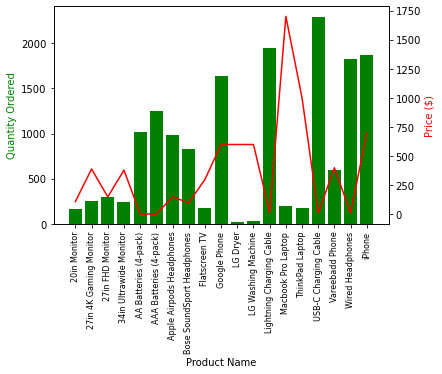

In [67]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = df.groupby('Product').mean()['Price Each']  # Mean price for each product

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='r')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='r')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()
fig.savefig('product_price_quantity.png')

** So, reason behind USB-C Charging Cable are sold most is it is a necessary product and its easy affordable**